[[ 1.91214438 -0.51027049 -0.44193343 -0.47341363 -0.31488841 -0.38410307]
 [-1.64893594  1.11270897 -0.61977219 -0.64676625  1.28785592  0.99873768]
 [ 1.91214438 -0.51027028 -0.82200995 -0.82011889 -0.31488835 -0.26200369]
 ...
 [-0.45937553 -0.84184024  1.01382735  0.95550021 -1.57037143 -0.20325779]
 [-0.24351375 -0.95259315  1.01382735  0.95550021 -1.3566721  -0.41567962]
 [ 0.59642074 -0.41902261  1.01382735  0.95550021 -0.39502545  0.64852692]]


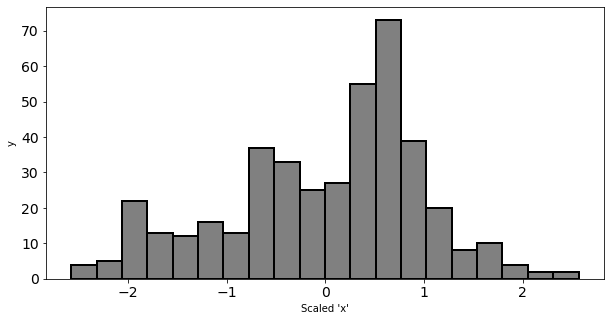

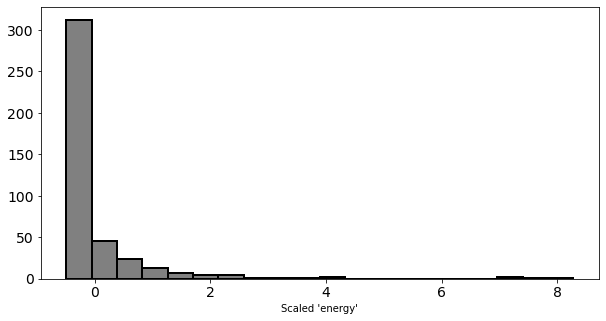

In [8]:
# EXERCISE 1: SCALING DATA WITH STANDARD SCALING

%matplotlib inline
import numpy as np # arrays
import pandas as pd # reading files
import matplotlib.pyplot as plt # graphing/plotting 
import math

# Load the dataset (.csv) using pandas package

CMS_calori_dataset = pd.read_csv('hgcal.csv')

# .head directive on the panda dataframe displays the first n-rows

# CMS_calori_dataset.head(n = 10)

# Convert the panda dataframe into numpy 2D array

CMS_calori_dataset_np = CMS_calori_dataset.to_numpy()

# The converted numpy array has the dimension of 420 (rows) x 8 (columns)

# print(CMS_calori_dataset_np.shape)

# Extract only x, y, z, eta, phi and energy columns from the dataset and stack them along column direction
# Name this new 2D array CMS_calori_dataset_np_sub. 
# The array should have dimension 420 (rows) x 6 (columns)

CMS_calori_dataset_np_sub = CMS_calori_dataset_np[:, 1:7]
# print(CMS_calori_dataset_np_sub[:, 0])
# print(CMS_calori_dataset_np_sub.shape)


# Create the scaling function

def scale_data(arr):

    y_dim = arr.shape[0] # of rows (420)
    x_dim = arr.shape[1] # of columns (6) 
    np.vsplit(arr, x_dim) # splits array into each column
    empty_x = [[] for i in range(x_dim)] # creates empty 6 column array
    
    for i in range(x_dim): # scans through each column 
        arr_row = arr[:, i] # all rows of i-th column
        mean = 0 # create initial mean variable
        sd = 0 # create initial standard deviation variable
        
        for x in range(y_dim): # scans through rows of column 
            mean += arr_row[x] # calculates sum
        mean = mean/y_dim # calculates mean
        
        for x in range(y_dim):
            sd += (arr_row[x] - mean)**2 # calculates sum of variances
        sd = sd/y_dim # calulcates variance
        sd = sd**0.5 # calculates sd
        
        for x in range(y_dim):
            empty_x[i].append(float((arr_row[x]-mean)/sd)) # appending empty 6 column array with scaled data

    scaled_data = np.stack([empty_x[0], empty_x[1], empty_x[2], empty_x[3], empty_x[4], empty_x[5]]) # stacking each column together
    scaled_data = np.transpose(scaled_data)
    return scaled_data


# Test the function with CMS_calori_dataset_np_sub

CMS_calori_dataset_np_sub_scaled = scale_data(CMS_calori_dataset_np_sub)
print(CMS_calori_dataset_np_sub_scaled)


# EXAMPLES
# Data scale for 'x' column

plt.figure(figsize = (10, 5))
plt.hist(CMS_calori_dataset_np_sub_scaled[:, 0], bins = 20, facecolor = 'grey', edgecolor = 'black', linewidth = 2)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Scaled 'x'")  
plt.ylabel('y')  
plt.show()

# Data scale for 'energy' column

plt.figure(figsize = (10, 5))
plt.hist(CMS_calori_dataset_np_sub_scaled[:, 5], bins = 20, facecolor = 'grey', edgecolor = 'black', linewidth = 2)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Scaled 'energy'")
plt.show()


In [9]:
# EXERCISE 2: DATA SPLITTING

# Create the splitting function

def split_data(arr, split_proportions, axis):
    # Returns a list of numpy sub-arrays according to split proportions
    if axis == 0:
        split_rows_rough = [i * arr.shape[0] for i in split_proportions] # multiply each of 3 ratios by number of rows to get # of rows per split
        split_rows = [math.ceil(i) for i in split_rows_rough] # round each decimal data point up to ensure data in each 3 rows
        #split_rows[1] = split_rows[0] + split_rows[1] # setting the second number of rows to be the # of the second number of rows + the # of the first number of rows
        #split_rows[2] = split_rows[1] + split_rows[2]
        for i in range(len(split_proportions) - 1): # using previous statement to make each next number of rows cumulative sum of previous number of rows
            split_rows[i+1] = split_rows[i] + split_rows[i+1]
        split_data_list = np.split(arr, split_rows, axis = 0) # splitting rows
        return split_data_list
    
    elif axis == 1: # same thing but splitting vertically
        split_columns_rough = [i * arr.shape[1] for i in split_proportions] 
        split_columns = [math.ceil(i) for i in split_columns_rough]
        for i in range(len(split_proportions)-1):
            split_columns[i+1] = split_columns[i] + split_columns[i+1]
        split_data_list = np.split(arr, split_columns, axis = 1)
        return split_data_list
        
# Test your split function against scaled CMS Calorimieter dataset from exercise 1

sub_data_list_1 = split_data(arr = CMS_calori_dataset_np_sub_scaled, split_proportions = [0.6, 0.2, 0.2], axis = 0)

# Confirm that dataset has been split into correct shapes
# The correct dimensions should be (252, 6) (84, 6) (84, 6)

print(sub_data_list_1[0].shape, sub_data_list_1[1].shape, sub_data_list_1[2].shape)

# Test your split function against scaled CMS Calorimieter dataset from exercise 1

sub_data_list_2 = split_data(arr = CMS_calori_dataset_np_sub_scaled, split_proportions = [0.5, 0.5], axis = 1)

# Confirm that dataset has been split into correct shapes
# The correct dimensions should be (420, 3) (420, 3)

print(sub_data_list_2[0].shape, sub_data_list_2[1].shape)

(252, 6) (84, 6) (84, 6)
(420, 3) (420, 3)
